<a href="https://colab.research.google.com/github/MariiaS/ai_and_ds/blob/main/DS4B_Session1_assignement_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DS4B Session 1: Supervised models
# Gradient descent, linear regression, logistic regression
This assignment will use Python.

## 1. Implement linear regression
Here we implement a linear regression model to fit simple data.

In [ ]:
%matplotlib inline

#imports
from numpy import *
import matplotlib.pyplot as plt

### Import the data
The dataset contains two columns containing the amount of hours studied and the test scores students achieved, respectively.

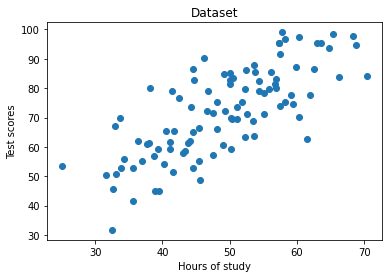

In [ ]:
points = genfromtxt('DS4B_study_data.csv', delimiter=',')

#Extract columns
x = array(points[:,0])
y = array(points[:,1])

#Plot the dataset
plt.scatter(x,y)
plt.xlabel('Hours of study')
plt.ylabel('Test scores')
plt.title('Dataset')
plt.show()

### Defining the hyperparamters

In [ ]:
#hyperparamters
learning_rate = 0.0001
initial_theta0 = 0
initial_theta1 = 0
num_iterations = 10

### Define the cost function

Edit the code below to update the total cost.

In [ ]:
def compute_cost(theta0, theta1, points):
    total_cost = 0
    M = float(len(points))
    
    #Compute sum of squared errors
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        total_cost += ((theta0+theta1*x)-y)**2# 0 ####### FIXME: replace with appropriate formula
        
    #Return average of squared error
    return total_cost / (2*M)

### Define the Gradient Descent functions
Edit the code below to update the gradient of both parameters.

In [ ]:
def gradient_descent_runner(points, starting_theta0, starting_theta1, learning_rate, num_iterations):
    theta0 = starting_theta0
    theta1 = starting_theta1
    cost_graph = []

    #For every iteration, optimize theta0, theta1 and compute its cost
    for i in range(num_iterations):
        cost_graph.append(compute_cost(theta0, theta1, points))
        theta0, theta1 = step_gradient(theta0, theta1, array(points), learning_rate)

    return theta0, theta1, cost_graph

def step_gradient(theta0_current, theta1_current, points, learning_rate):
    theta0_gradient = 0
    theta1_gradient = 0
    M = float(len(points))

    #Calculate Gradient
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        theta0_gradient += -(1/M)*(y-((theta1_current*x)+theta0_current))
        theta1_gradient += -(1/M)*x*(y-((theta1_current*x)+theta0_current))

    #Update current theta0 and theta1
    theta0_updated = theta0_current - learning_rate * theta0_gradient
    theta1_updated = theta1_current - learning_rate * theta1_gradient

    #Return updated parameters
    return theta0_updated, theta1_updated

### Run gradient_descent_runner() to get optimized parameters theta0 and theta1

In [ ]:
theta0, theta1, cost_graph = gradient_descent_runner(points, initial_theta0, initial_theta1, learning_rate, num_iterations)

#Print optimized parameters
print ('Optimized theta0:', theta0)
print ('Optimized theta1:', theta1)

#Print error with optimized parameters
print ('Minimized cost:', compute_cost(theta0, theta1, points))

Optimized theta0: 0.027567156422416045
Optimized theta1: 1.3744781890042335
Minimized cost: 60.89319803139149


### Plotting the cost per iterations

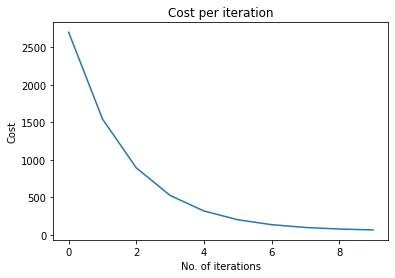

In [ ]:
plt.plot(cost_graph)
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.title('Cost per iteration')
plt.show()

How many iterations are needed to converge ?

**2 iterations are needed to converge**

Try several learning rates to compare them. Can you spot a situation of slow learning ? diverging gradient ?

**The lower the learning rate, the slower the learning happens and need much more iterations for instance with lr=0.0001. With increasing learning rate for instance lr=0.05 we can observe the situation of diverging gradient**


### Plot line of best fit

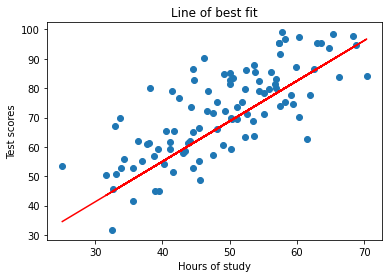

In [ ]:
#Plot dataset
plt.scatter(x, y)
#Predict y values
pred = theta0 + theta1 * x
#Plot predictions as line of best fit
plt.plot(x, pred, c='r')
plt.xlabel('Hours of study')
plt.ylabel('Test scores')
plt.title('Line of best fit')
plt.show()

## 2. Observe underfitting and overfitting of polynomial regression

Carefully review the code below taken from 
[sklearn](https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html#sphx-glr-auto-examples-model-selection-plot-underfitting-overfitting-py).

First, try and guess what it does.

Then run it.

Finally, describe what you see.

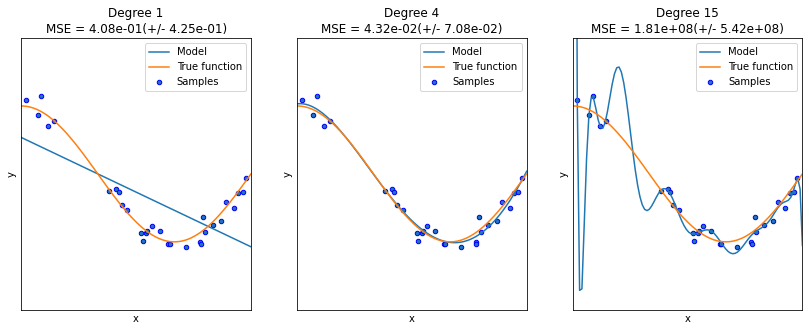

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

Description:

**On this graphs we can observe a classical visualisation of underfitting on the left graph, when we're trying to describe non-linear function with the linear equitation. It leads to the high MSE, that means that our linear model doesn't fit well for this kind of task and gives unaccurate results too often.  On the right picture we can observe the classical overfitting example, when the model is presented as polyminal of degree 15, that leads to too accurate results on the current training set. The problemn is that the model isn't able to see the trend and work properly on before unseen data points.In all cases both underfitting and overfitting can be seen through the cross-validation, when we calcilate mean square error (MSE) on before unseen validation set. The higher is the MSE, the worse our model represents the trend in the data.**

## 3. Side code: simple logistic regression

Here again, carefully review the code below taken from 
[sklearn](https://scikit-learn.org/stable/auto_examples/linear_model/plot_logistic.html#sphx-glr-auto-examples-linear-model-plot-logistic-py).

First, try and guess what it does.

Then run it.

Finally, describe what you see.

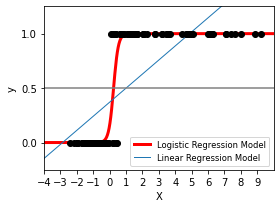

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model
from scipy.special import expit

# General a toy dataset:s it's just a straight line with some Gaussian noise:
xmin, xmax = -5, 5
n_samples = 100
np.random.seed(0)
X = np.random.normal(size=n_samples)
y = (X > 0).astype(np.float)
X[X > 0] *= 4
X += .3 * np.random.normal(size=n_samples)

X = X[:, np.newaxis]

# Fit the classifier
clf = linear_model.LogisticRegression(C=1e5)
clf.fit(X, y)

# and plot the result
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.scatter(X.ravel(), y, color='black', zorder=20)
X_test = np.linspace(-5, 10, 300)

loss = expit(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, loss, color='red', linewidth=3)

ols = linear_model.LinearRegression()
ols.fit(X, y)
plt.plot(X_test, ols.coef_ * X_test + ols.intercept_, linewidth=1)
plt.axhline(.5, color='.5')

plt.ylabel('y')
plt.xlabel('X')
plt.xticks(range(-5, 10))
plt.yticks([0, 0.5, 1])
plt.ylim(-.25, 1.25)
plt.xlim(-4, 10)
plt.legend(('Logistic Regression Model', 'Linear Regression Model'),
           loc="lower right", fontsize='small')
plt.tight_layout()
plt.show()

Description:

**Here on the graph we can observe to types of model: Linear regression and Logistic Regression. performed on the data that we generated. 
As our data is not linear (looks more like sigmoid, but in fact two lines on different levels of axis), linear regression doesn't perform well on the current dataset. Whereas Logistic regression model was able to show the trend in the data quite well (however, we don't show any metrics there to measure the accuracy).**